# Juntando as etapas descritas anteriormente em apenas duas partes: Forward Pass e BackPropagation

## Bibliotecas utilizadas:

In [1]:
## Libraries used
import math
import numpy as np
import random
from keras.datasets import mnist
import matplotlib.pyplot as plt
import snn_train as snn

## Definição de parâmetros utilizados pela SNN:

In [2]:
## Definition of a set of parameters that will be used for analysis and code recycling too.
input_params = snn.get_input_params()

snn.set_max_current()
snn.set_min_current()

# Execução do bloco principal do algoritmo de treinamento:

## Extração das Amostras de entrada para treinamento da Rede Neural

In [3]:
## Extração das amostras
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255
# Escolhe um range aleatório de labels de acordo com sua quantidade
labels = random.sample(range(0,input_params['num_classes']), input_params['num_classes'])
samples = []
test_samples = []
print(np.sort(labels))
# Monta um array com samples por label
for label in labels:
    samples_per_label = x_train[np.where(y_train == label)]
    test_samples_per_label = x_test[np.where(y_test == label)]

    num_samples_per_label = samples_per_label.shape[0]
    num_test_samples_per_label = test_samples_per_label.shape[0]

    samples_idx = random.sample(range(0, num_samples_per_label-1), input_params['num_samples'])
    test_samples_idx = random.sample(range(0, num_test_samples_per_label-1), input_params['num_samples'])
    
    samples.append(samples_per_label[samples_idx])
    test_samples.append(test_samples_per_label[test_samples_idx])

samples = np.asarray(samples)
test_samples = np.asarray(test_samples)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
test_samples.shape

(10, 10, 28, 28)

In [5]:
noise_probability = 0.05

for c in range(input_params['num_classes']):
  for s in range(input_params['num_samples']):
    samples[c][s] = snn.img_noise(samples[c][s], noise_probability)
    

## Geração dos Impulsos Desejados para a(s) classe(s) definida(s):

In [6]:
# Expected Values for Spikes for classes
desired_range = snn.spike_interval_generator(simulation_time=input_params['lif_simulation_time'])
desired_count = snn.spike_count_generator(simulation_time=input_params['lif_simulation_time'])
dsb, dst = snn.spike_times_generator(desired_range, desired_count, -1)
input_params['desired_spikes'] = dsb[np.sort(labels)]
input_params['desired_times'] = dst[np.sort(labels)]
input_params['desired_count'] = desired_count

c:\Users\dmene\Anaconda3\envs\snn-pso\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [7]:
print("Intervalo e Spike Train Esperado por Classe:")
for i in range(input_params['num_classes']):
  print("Classe "+str(i)+ ":", desired_range[i], dst[i])

Intervalo e Spike Train Esperado por Classe:
Classe 0: (0, 9) [1 4]
Classe 1: (10, 19) [10 11 12 13 15 16 17 18]
Classe 2: (20, 29) [20 22 23 24 27 28]
Classe 3: (30, 39) [30 31 33 34 35 36 37 38]
Classe 4: (40, 49) [41 44 46 47 48]
Classe 5: (50, 59) [50 52 53 55]
Classe 6: (60, 69) [60 61 62 63 64 65 66 67 68]
Classe 7: (70, 79) [71 72 73 74 75 76 77 78]
Classe 8: (80, 89) [80 81 84 85 87 88]
Classe 9: (90, 99) [90 91 92 93 94 96 97]


## Treinamento da Rede Neural:

In [9]:
#print(input_params['num_samples'])
training_error = snn.fit_new(samples)

####################################################################################
EPOCH 0, SAMPLE 0, LABEL/CLASS 0
MLP SPIKE TRAIN:  []
MLP GRADIENT:  [ 0.          0.56093602  1.01511181  1.37776672 -1.24665488 -1.41002498
 -1.53101203 -1.61620314 -1.67131551 -1.70130242 -1.71044676 -1.70244385
 -1.68047444 -1.64726916 -1.60516545 -1.5561576  -1.50194094 -1.44395063
 -1.38339589 -1.32128994 -1.2584764  -1.19565236 -1.13338866 -1.07214758
 -1.01229835 -0.95413065 -0.89786644 -0.84367019 -0.79165785 -0.74190456
 -0.69445139 -0.64931112 -0.60647329 -0.56590847 -0.52757198 -0.49140707
 -0.4573476  -0.42532037 -0.39524702 -0.36704573 -0.34063252 -0.31592248
 -0.29283064 -0.27127279 -0.25116609 -0.23242957 -0.21498455 -0.1987549
 -0.18366727 -0.16965129 -0.15663963 -0.14456806 -0.13337551 -0.12300398
 -0.11339858 -0.10450741 -0.09628153 -0.08867483 -0.08164396 -0.0751482
 -0.0691494  -0.06361178 -0.0585019  -0.05378849 -0.04944238 -0.04543633
 -0.04174499 -0.03834474 -0.0352136  -0.03233

ValueError: operands could not be broadcast together with shapes (5,5) (10,) 

Text(0, 0.5, 'MSE')

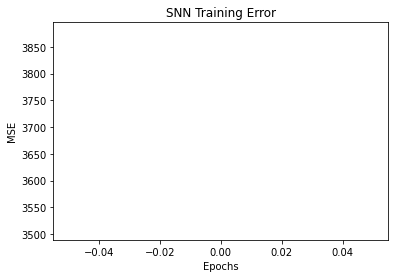

In [11]:
plt.plot(training_error)
plt.title("SNN Training Error")
plt.xlabel('Epochs') 
plt.ylabel('MSE') 

In [23]:
# Salvando os pesos para testes de validacao
saved_enc_weights = input_params["encoding_weights"]
saved_mlp_weights = input_params["mlp_weights"]

In [24]:
input_params["mlp_current"]

array([-996.05697062, -996.05697062, -996.05697062, -996.05697062,
       -996.05697062, -996.05697062, -996.05697062, -996.05697062,
       -996.05697062, -996.05697062])